In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns


In [49]:
# Importing the dataset]
dataset_b = pd.read_csv('dataset/train/train.csv')
train_dataset= dataset_b.copy()

In [50]:
dataset_b

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [51]:
train_dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [52]:
train_dataset.shape

(891, 12)

In [53]:
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Except for the Age column, rest of the numeric columns have no null values
#### We can get the idea of the skew by comparing the mean with median. Except for the Fare column, which seems to be twice the median, rest of the columns have a comparable mean & median or a 0 median(for 1/0 values or columns with mostly 0's)

In [54]:
train_dataset.columns[train_dataset.isnull().any()] ### Checking missing values in non numeric variables


Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [55]:
## Let us check how many values are missing across different columns
train_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### The major missing values are in Age and Cabin Column

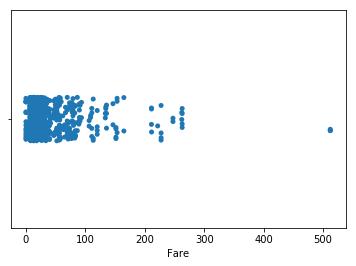

In [56]:
sns.stripplot(x=train_dataset['Fare'])

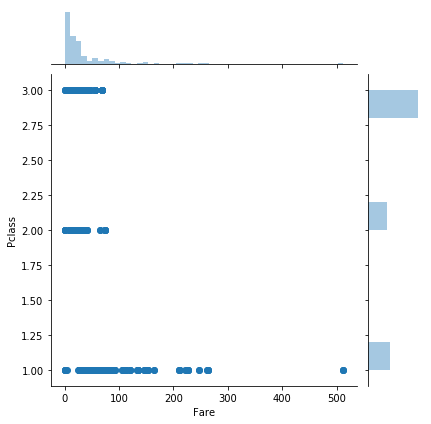

In [57]:
sns.jointplot(train_dataset['Fare'], train_dataset['Pclass'])

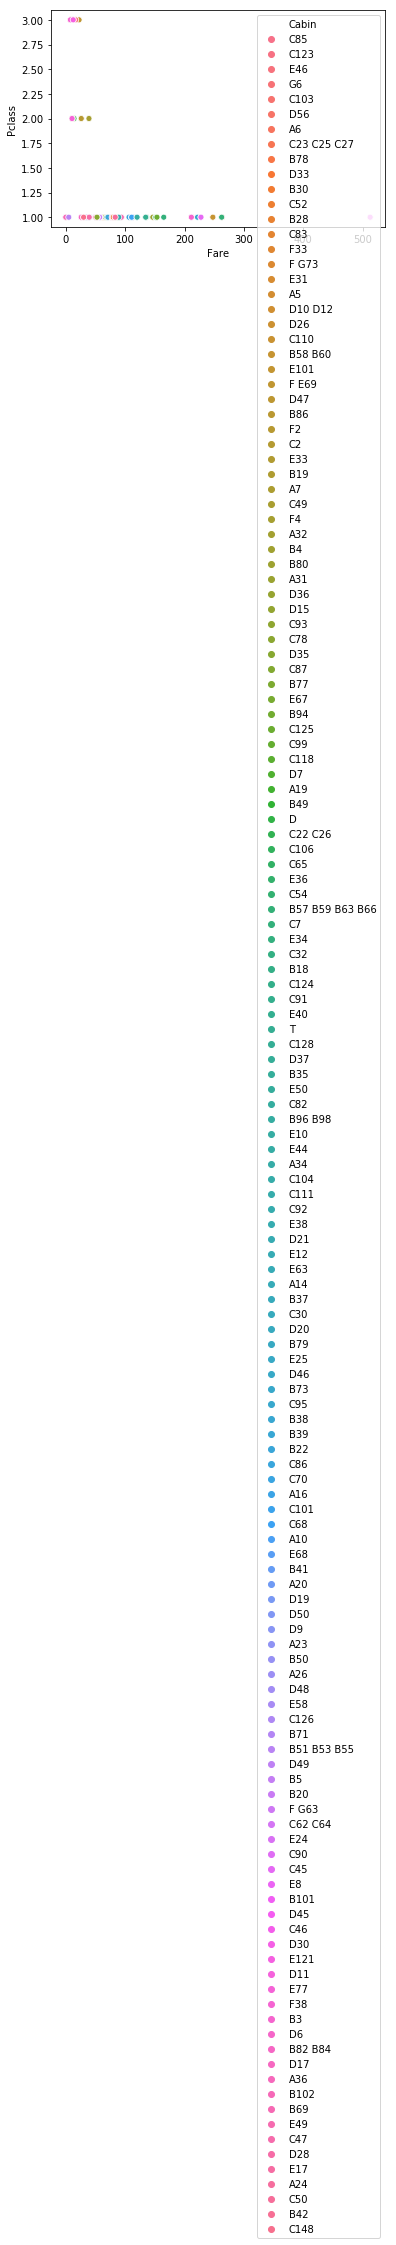

In [58]:
sns.scatterplot(x="Fare", y="Pclass", hue="Cabin",data=train_dataset)

### Oops, too many cabin types, cannot make any sense. Let us try to see if the characters A, B, C in the cabins have a relation to cost

In [59]:
### Let us extract the first character from the Cabin

In [60]:
train_dataset.loc[train_dataset['Cabin'].notnull(), 'CabinType'] = train_dataset['Cabin'].str[0]

In [61]:
train_dataset['CabinType'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: CabinType, dtype: int64

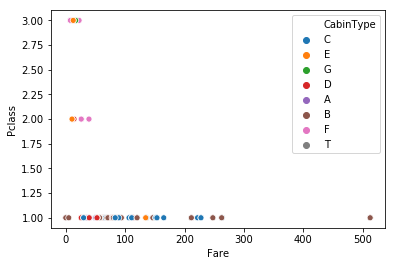

In [62]:
sns.scatterplot(x="Fare", y="Pclass", hue="CabinType",data=train_dataset)

In [63]:
### Cannot make much sense out of the fare vs Cabin type

In [64]:
train_dataset['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### Let us see how many men vs women survived

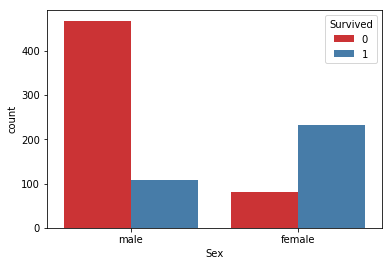

In [65]:
sns.countplot(x = 'Sex', hue = 'Survived', palette = 'Set1', data = train_dataset)

#### Looks like a lot of women survived compared to men. I just did some research and during the titanic disaster, the women were rescued first and the graph proves the story

### Let us see if survival had to do anything with the CabinType

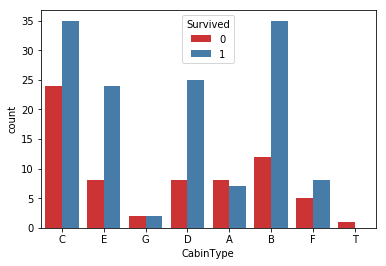

In [66]:
sns.countplot(x = 'CabinType', hue = 'Survived', palette = 'Set1', data = train_dataset)

#### Cannot decipher any strong correlation here

In [67]:
train_dataset.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'CabinType'],
      dtype=object)

### Let us see if survival had to do anything with the Passenger Class

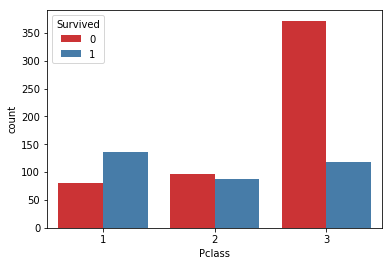

In [68]:
sns.countplot(x = 'Pclass', hue = 'Survived', palette = 'Set1', data = train_dataset)

#### Indeed, a lot of people from Class 3 died. Unfair world :( !! Moral of the story, if you want to travel in a ship, make sure you are rich

### Let us see if survival had to do anything with the Embark station

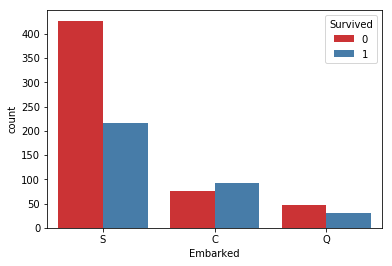

In [69]:
sns.countplot(x = 'Embarked', hue = 'Survived', palette = 'Set1', data = train_dataset)

#### Surprisingly, it looks like lot of people from Southampton met with death. Cannot understand why. Maybe many of these passengers were from class3? Let's find out.

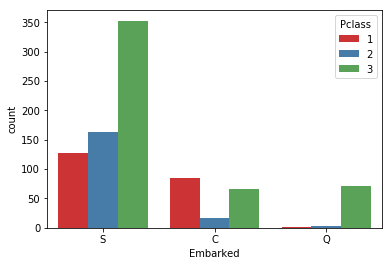

In [70]:
sns.countplot(x = 'Embarked', hue = 'Pclass', palette = 'Set1', data = train_dataset)

#### Yes indeed, the highest chunk of travelers on Class 3 were from Southampton. In fact most of the travelers on the ship were from Southampton

In [71]:
100*train_dataset['Embarked'].value_counts()/sum(train_dataset['Embarked'].value_counts())

S    72.440945
C    18.897638
Q     8.661417
Name: Embarked, dtype: float64

### We all have an emotion to family. Or at least most of us. Let us check if having family members on board influenced survival. We take two columns of SibSp and Parch into account. If any one of them was above zero, we will create a new column to indicate the passenger had family onboard

In [72]:
train_dataset['FamilyOnboard']=0

train_dataset.loc[(train_dataset['SibSp']>0) | (train_dataset['Parch']>0),'FamilyOnboard'] = 1

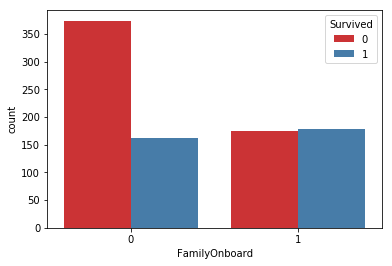

In [73]:
sns.countplot(x = 'FamilyOnboard', hue = 'Survived', palette = 'Set1', data = train_dataset)

#### The graph shows that if a passenger was traveling alone, the chances of survival were higher. Humans are very emotional beings even when it comes to life or death situations

### Let us check how did age influence survival. We cannot directly use age in countplot because the numbers will be too many. Instead we will break the data into different age groups.

In [74]:
### Before that let us replace the age column which has missing values. You could replace it with one line of code train_dataset['Age']=train_dataset['Age'].fillna(train_dataset['Age'].mean())
### However, I am trying to replace the missing values such that the proportion of values remains the same
def replace_with_proportion(frame, column):
     isnull = frame[column].isnull()
     sample = frame[column].dropna()
     sample=set(sample)
     countframe=pd.DataFrame(columns=["name", "count", "proportion"])
     for x in sample:
          countframe.loc[-1] = [x,frame.loc[frame[column] == x].shape[0], 0 ]
          countframe.index = countframe.index + 1
     countframe['proportion']=countframe['count']/countframe['count'].sum()
     to_fill=np.random.choice(countframe['name'], size=(frame[column].isnull().sum(),), p=countframe['proportion'])
     frame.loc[isnull, column] = to_fill
     return frame
train_dataset=replace_with_proportion(train_dataset, 'Age')

In [75]:
train_dataset['AgeGroup']=0

train_dataset.loc[train_dataset['Age']<8,'AgeGroup'] = 1
train_dataset.loc[(train_dataset['Age']>=8) & (train_dataset['Age']<18),'AgeGroup'] = 2
train_dataset.loc[(train_dataset['Age']>=18) & (train_dataset['Age']<30),'AgeGroup'] = 3
train_dataset.loc[(train_dataset['Age']>=30) & (train_dataset['Age']<40),'AgeGroup'] = 4
train_dataset.loc[(train_dataset['Age']>=40) & (train_dataset['Age']<60),'AgeGroup'] = 5
train_dataset.loc[(train_dataset['Age']>=60) & (train_dataset['Age']<80),'AgeGroup'] = 6
train_dataset.loc[train_dataset['Age']>=80,'AgeGroup'] = 7

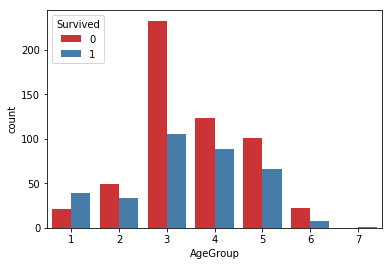

In [76]:
sns.countplot(x = 'AgeGroup', hue = 'Survived', palette = 'Set1', data = train_dataset)

#### It looks like the age group of 18 to 30, which is the most athletic age group seems to have the highest possibility of survival

### Let us separate the numeric columns from the non numeric ones

In [79]:
numeric=train_dataset.select_dtypes(include=[np.number])
categorical=train_dataset.select_dtypes(exclude=[np.number])

In [80]:
numeric

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilyOnboard,AgeGroup
0,1,0,3,22.00,1,0,7.2500,1,3
1,2,1,1,38.00,1,0,71.2833,1,4
2,3,1,3,26.00,0,0,7.9250,0,3
3,4,1,1,35.00,1,0,53.1000,1,4
4,5,0,3,35.00,0,0,8.0500,0,4
5,6,0,3,25.00,0,0,8.4583,0,3
6,7,0,1,54.00,0,0,51.8625,0,5
7,8,0,3,2.00,3,1,21.0750,1,1
8,9,1,3,27.00,0,2,11.1333,1,3
9,10,1,2,14.00,1,0,30.0708,1,2


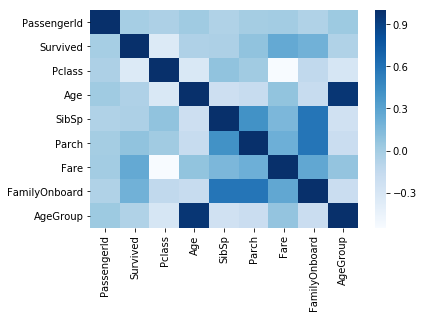

In [81]:
### Let us find the correlation between the columns
correlation=numeric.corr()
sns.heatmap(correlation, cmap="Blues")

#### As expected age has a high correlation with Age Group because we derived it from Age, however we are more interested in finding the correlation between Survival and other columns. Let us find that out

In [47]:
correlation['Survived'].sort_values(ascending=False)

Survived         1.000000
Fare             0.257307
FamilyOnboard    0.203367
Parch            0.081629
AgeGroup         0.018952
PassengerId     -0.005007
SibSp           -0.035322
Age             -0.077221
Pclass          -0.338481
Name: Survived, dtype: float64

### None of the correlations are strong, however Fare, FamilyOnboard and Pclass have the most correlation to Survival

In [84]:
categorical

,Name,Sex,Ticket,Cabin,Embarked,CabinType
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S,C
4,"Allen, Mr. William Henry",male,373450,NaN,S,NaN
5,"Moran, Mr. James",male,330877,NaN,Q,NaN
6,"McCarthy, Mr. Timothy J",male,17463,E46,S,E
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S,NaN
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,347742,NaN,S,NaN
9,"Nasser, Mrs. Nicholas (Adele Achem)",female,237736,NaN,C,NaN


In [2]:
import numpy as np
np.tanh([3,1])

array([ 0.99505475,  0.76159416])

In [7]:
def softmax_handcoded_1d(array_input):
    return np.exp(array_input)/sum(np.exp(array_input))

In [8]:
softmax_handcoded_1d([.762, 1.757])

array([ 0.26992562,  0.73007438])